In [39]:
# tensorflow와 tf.keras를 임포트합니다
import tensorflow as tf
from tensorflow import keras
from keras import layers

# 헬퍼(helper) 라이브러리를 임포트합니다
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.3.0


## Fashin Mnist 불러오기

In [2]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 1s 0us/step


## 데이터 차원 확인

In [5]:
print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)


(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


## 데이터 정체 확인

In [17]:
# train_images[0]
train_images[0].shape

(28, 28)

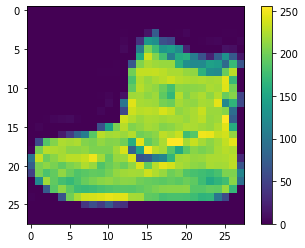

In [18]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.show()

In [14]:
train_labels[0]

9

In [170]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

## 데이터 표준화(0~1)

In [60]:
train_images=train_images/255.0
test_images=test_images/255.0

In [27]:
np.mod(15,3)

0

## 표준화 후 그림 확인

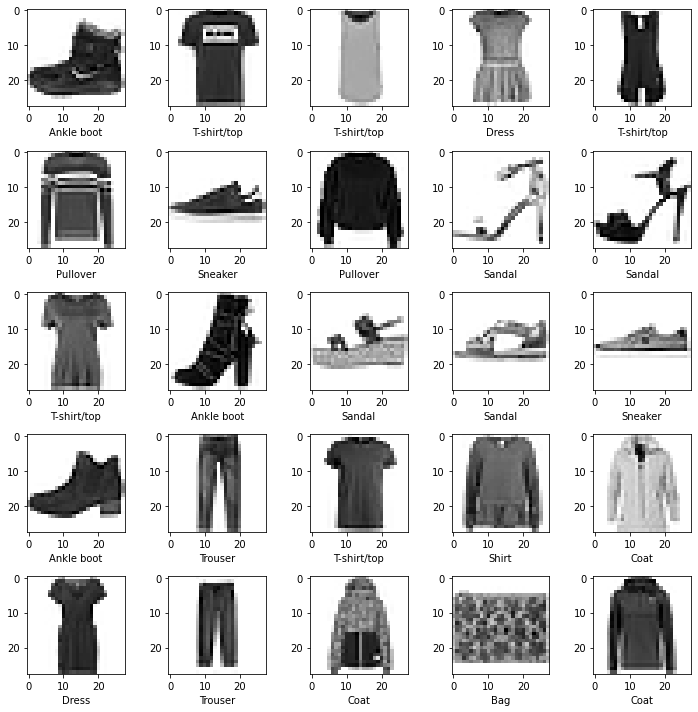

In [31]:
import matplotlib.pyplot as plt

fig, axs=plt.subplots(5,5,figsize=(10,10),)

for i in range(25):
    k,j = i//5, i%5    
    axs[k,j].imshow(train_images[i], cmap=plt.cm.binary)
    axs[k,j].set_xlabel(class_names[train_labels[i]])
fig.tight_layout()


## 모델 빌딩

In [40]:
def build_model():
    model = keras.Sequential([
        layers.Flatten(input_shape=(28,28)),
        layers.Dense(128, activation='relu'),
        layers.Dense(10, activation='softmax'),
        
    ])

    optimizer = tf.keras.optimizers.RMSprop(0.001)

    model.compile(loss='sparse_categorical_crossentropy',optimizer='adam', metrics=['accuracy'])
    return model

In [49]:
model=build_model()

In [50]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [51]:
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: print('')
    print('.', end='')

# patience 매개변수는 성능 향상을 체크할 에포크 횟수입니다
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

## 모델 학습

In [52]:
# history = model.fit(train_images, train_labels, epochs=1000, validation_split = 0.2, verbose = 0, callbacks=[early_stop, PrintDot()])
history = model.fit(train_images, train_labels, epochs=1000, validation_split = 0.2, verbose = 1, batch_size=64)
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
plt.plot(hist['epoch'], hist['accuracy'], label='Train Error')
plt.plot(hist['epoch'], hist['val_accuracy'],label = 'Val Error')
plt.legend()
plt.show()

Epoch 1/1000
750/750 [==============================] - 3s 4ms/step - loss: 4.7146 - accuracy: 0.7014 - val_loss: 0.8740 - val_accuracy: 0.7146
Epoch 2/1000
750/750 [==============================] - 3s 4ms/step - loss: 0.7364 - accuracy: 0.7520 - val_loss: 0.6971 - val_accuracy: 0.7688
Epoch 3/1000
750/750 [==============================] - 3s 4ms/step - loss: 0.6076 - accuracy: 0.7866 - val_loss: 0.6299 - val_accuracy: 0.7883
Epoch 4/1000
750/750 [==============================] - 3s 4ms/step - loss: 0.5329 - accuracy: 0.8112 - val_loss: 0.5796 - val_accuracy: 0.8024
Epoch 5/1000
750/750 [==============================] - 3s 4ms/step - loss: 0.4967 - accuracy: 0.8230 - val_loss: 0.5351 - val_accuracy: 0.8184
Epoch 6/1000
750/750 [==============================] - 3s 4ms/step - loss: 0.4774 - accuracy: 0.8285 - val_loss: 0.5327 - val_accuracy: 0.8258
Epoch 7/1000
750/750 [==============================] - 3s 4ms/step - loss: 0.4703 - accuracy: 0.8310 - val_loss: 0.5359 - val_accuracy:

KeyboardInterrupt: 

## 테스팅 데이터로 확인

In [61]:
model.evaluate(test_images,test_labels, verbose=2)

188/188 - 1s - loss: 0.4970 - accuracy: 0.8595


[0.49695655703544617, 0.859499990940094]

## 예측된 데이터 분석

In [257]:
def plot_picture(idx):
    fig, ax = plt.subplots(1,2,figsize=(10,4))
    g=ax[0].imshow(test_images[idx],cmap=plt.cm.binary, aspect="auto")
    ax[0].set_title('predicted: '+class_names[pred[idx].argmax()])    
    g=ax[1].bar(class_names, pred[idx])
    ax[1].set_ylim([0,1])
    ax[1].set_xticklabels(class_names, rotation=45)
    ax[1].set_title('actual: '+class_names[test_labels[idx]])



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  if __name__ == '__main__':


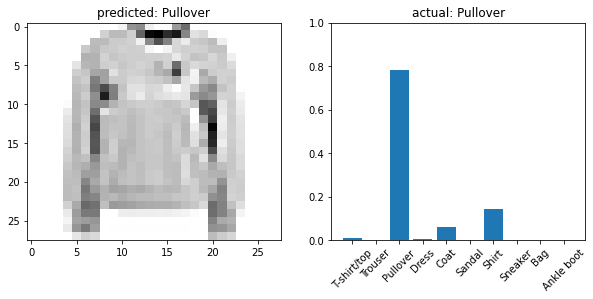

In [262]:
plot_picture(np.random.choice(range(len(test_images))))

## 못맞춘 데이터 분석

In [263]:
idx=np.where(test_labels!=pred.argmax(axis=1))[0]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  if __name__ == '__main__':


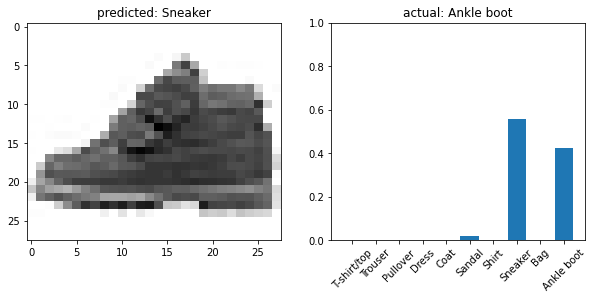

In [269]:
plot_picture(np.random.choice(idx))